### Practical no.: 5
Name: Madhav Jha <br>
Roll no.: 48 <br>
Batch: E3 <br>
Branch: CSE(AIML) <br>
Semester: VI

### AIM: Text Summarization using Spacy

#### Associated research paper:
Ibrahim Alshibly, Sabreen Al-Shorfat, Mohammad Otair et al. Text summarization of News Articles based on named entity recognition using Spacy library, 20 March 2023, PREPRINT (Version 1) available at Research Square [https://doi.org/10.21203/rs.3.rs-2688915/v1]

link: https://www.researchsquare.com/article/rs-2688915/latest.pdf

In [ ]:
# !pip install spacy
import spacy
# !python3 -m spacy download en_core_web_sm

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
# !pip install nltk
import nltk
# nltk.download('all')
from nltk.book import *

In [ ]:
txt = nltk.corpus.genesis.raw()
txt = txt[:5000]

### Flowchart
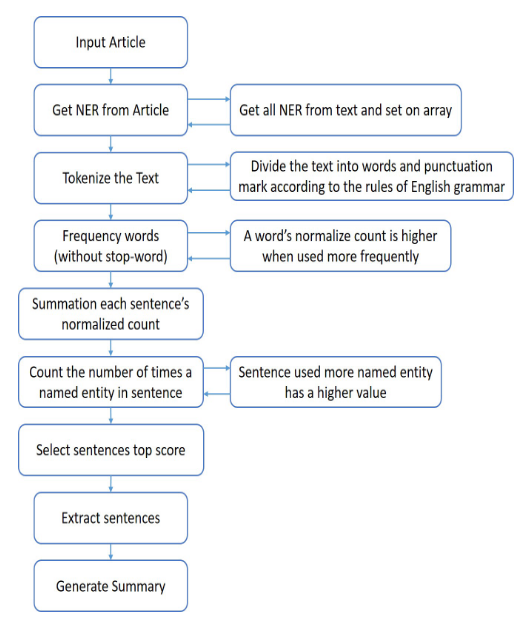

In [ ]:
# NER from text
nlp_txt = nlp(txt)
nlp_ner = [(i, i.label_, i.label) for i in nlp_txt.ents]
nlp_ner[:20]

[(earth, 'LOC', 385),
 (God, 'PERSON', 380),
 (God, 'PERSON', 380),
 (the light Day, 'DATE', 391),
 (the evening and the morning, 'TIME', 392),
 (the first day, 'DATE', 391),
 (God, 'PERSON', 380),
 (God, 'PERSON', 380),
 (the
  morning,
  'TIME',
  392),
 (the second day, 'DATE', 391),
 (God, 'PERSON', 380),
 (one, 'CARDINAL', 397),
 (God, 'PERSON', 380),
 (Earth, 'LOC', 385),
 (Se, 'PERSON', 380),
 (God, 'PERSON', 380),
 (the evening and the morning, 'TIME', 392),
 (the third day, 'DATE', 391),
 (God, 'PERSON', 380),
 (the day, 'DATE', 391)]

In [ ]:
ner_txt = []
for i in nlp_ner:
  ner_txt.append(str(i[0]))
ner_txt

['earth',
 'God',
 'God',
 'the light Day',
 'the evening and the morning',
 'the first day',
 'God',
 'God',
 'the\nmorning',
 'the second day',
 'God',
 'one',
 'God',
 'Earth',
 'Se',
 'God',
 'the evening and the morning',
 'the third day',
 'God',
 'the day',
 'the night',
 'days',
 'two',
 'the\nday',
 'the day',
 'the evening and the morning',
 'the fourth day',
 'God',
 'God',
 'earth',
 'the evening and the morning',
 'the fifth day',
 'God',
 'God',
 'earth',
 'earth',
 'God',
 'Behold',
 'the evening and the morning',
 'the sixth day',
 'the seventh day',
 'the seventh day',
 'the seventh day',
 'the day',
 'Eden']

In [ ]:
ner_text_dict = {}
for i in ner_txt:
  if i not in ner_text_dict.keys():
    ner_text_dict[i] = 0
  ner_text_dict[i] += 1
ner_text_dict

{'earth': 4,
 'God': 13,
 'the light Day': 1,
 'the evening and the morning': 5,
 'the first day': 1,
 'the\nmorning': 1,
 'the second day': 1,
 'one': 1,
 'Earth': 1,
 'Se': 1,
 'the third day': 1,
 'the day': 3,
 'the night': 1,
 'days': 1,
 'two': 1,
 'the\nday': 1,
 'the fourth day': 1,
 'the fifth day': 1,
 'Behold': 1,
 'the sixth day': 1,
 'the seventh day': 3,
 'Eden': 1}

In [ ]:
mx = 0
for i in ner_text_dict.keys():
  mx = max(mx, ner_text_dict[i])
mx

13

In [ ]:
for i in ner_text_dict.keys():
  ner_text_dict[i] = round(ner_text_dict[i]/mx, 4)

In [ ]:
# word tokenization of text without stop words
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation

pos_tag = ['PEOPN', 'ADJ', 'NOUN', 'VERB']
stopwords = list(STOP_WORDS)
keywords = []
for i in nlp_txt:
  if(i.text in stopwords or i.text in punctuation):
    continue
  if(i.pos_ in pos_tag):
    keywords.append(i)

keywords[:20]

[beginning,
 created,
 earth,
 earth,
 form,
 void,
 darkness,
 face,
 deep,
 moved,
 face,
 waters,
 said,
 Let,
 light,
 light,
 saw,
 light,
 good,
 divided]

In [ ]:
# frequecy of words
freq_words = {}
for i in keywords:
  i = str(i)
  if i not in freq_words.keys():
    freq_words[i] = 0
  freq_words[i] += 1

mx = 0
for i in freq_words.keys():
  mx = max(mx, freq_words[i])
print("max freq: ", mx)

max freq:  24


In [ ]:
# normalization of frequency
for i in freq_words.keys():
  freq_words[i] = round(freq_words[i]/mx,4)

freq_words

{'beginning': 0.0417,
 'created': 0.2917,
 'earth': 1.0,
 'form': 0.0417,
 'void': 0.0417,
 'darkness': 0.125,
 'face': 0.1667,
 'deep': 0.0417,
 'moved': 0.0417,
 'waters': 0.4583,
 'said': 0.4167,
 'Let': 0.3333,
 'light': 0.4167,
 'saw': 0.2917,
 'good': 0.2917,
 'divided': 0.0833,
 'called': 0.2083,
 'evening': 0.25,
 'morning': 0.25,
 'day': 0.5417,
 'firmament': 0.3333,
 'midst': 0.0417,
 'let': 0.25,
 'divide': 0.125,
 'firmame': 0.0417,
 'second': 0.0417,
 'heaven': 0.0417,
 'gathered': 0.0417,
 'place': 0.0417,
 'dry': 0.0833,
 'land': 0.0833,
 'appe': 0.0417,
 'gathering': 0.0417,
 'bring': 0.125,
 'grass': 0.0833,
 'herb': 0.2083,
 'yielding': 0.2083,
 'seed': 0.25,
 'fruit': 0.1667,
 'tree': 0.1667,
 'kind': 0.25,
 'ear': 0.0833,
 'brought': 0.0833,
 'lights': 0.125,
 'night': 0.0833,
 'signs': 0.0417,
 'seasons': 0.0417,
 'days': 0.0417,
 'great': 0.0833,
 'greater': 0.0417,
 'rule': 0.125,
 'lesser': 0.0417,
 'nig': 0.0417,
 'stars': 0.0417,
 'set': 0.0417,
 'darkne': 0.0

In [ ]:
# ranking sentences
sents = {}
for sent in nlp_txt.sents:

  if(sent not in sents.keys()):
    sents[sent] = 0

  for w in sent:
    word = str(w.text)
    if(word in freq_words.keys()):
      sents[sent] += freq_words[word]
  
  for i in ner_text_dict.keys():
    if i in str(sent):
      sents[sent] += ner_text_dict[i]
sents

{In the beginning God created the heaven and the earth.: 2.6828,
 And the earth was without form, and void; and darkness was
 upon the face of the deep.: 1.7245000000000004,
 And the Spirit of God moved upon
 the face of the waters.: 1.6667,
 And God said, Let there be light: and there was light.: 2.5834,
 And God saw the light, that it was good: and God divided the
 light from the darkness.: 2.6250999999999998,
 And God called the light Day, and the darkness he called
 Night.: 2.0352,
 And the evening and the morning were the first day.: 1.5032,
 And God said, Let there be a firmament in the midst of the
 waters, and let it divide the waters from the waters.: 3.8749,
 And God made the firmament, and divided the waters which were
 under the firmament from the waters which were above the
 firmame and it was so.: 2.7081999999999997,
 And God called the firmament Heaven.: 1.5415999999999999,
 And the evening and the
 morning were the second day.: 1.2371999999999999,
 And God said, Let the

In [ ]:
sent_list = []
for i in sents.keys():
  temp = ( round(sents[i], 4), i)
  sent_list.append(temp)
sent_list.sort(reverse=True)
sent_list[:10]

[(7.4135,
  These are the generations of the heavens and of the earth when
  they were created, in the day that the LORD God made the earth
  and the heavens,
  And every plant of the field before it was in the earth, and
  every herb of the field before it gr for the LORD God had
  not caused it to rain upon the earth, and there was not a man
  to till the ground.),
 (5.8909,
  And God said, Let us make man in our image, after our
  likene and let them have dominion over the fish of the sea,
  and over the fowl of the air, and over the cattle, and over
  all the earth, and over every creeping thing that creepeth
  upon the earth.),
 (5.3656,
  And God set them in the firmament of the heaven to give light
  upon the earth,
  And to rule over the day and over the night, and to divide the
  light from the darkne and God saw that it was good.),
 (5.3077,
  And God said, Let the earth bring forth the living creature
  after his kind, cattle, and creeping thing, and beast of the
  earth aft

In [ ]:
# joining top sentences
summary = ""
sent_len = min(5, len(sent_list))
for i in range(sent_len):
  summary += str(sent_list[i][1])
summary

'These are the generations of the heavens and of the earth when\nthey were created, in the day that the LORD God made the earth\nand the heavens,\nAnd every plant of the field before it was in the earth, and\nevery herb of the field before it gr for the LORD God had\nnot caused it to rain upon the earth, and there was not a man\nto till the ground.\nAnd God said, Let us make man in our image, after our\nlikene and let them have dominion over the fish of the sea,\nand over the fowl of the air, and over the cattle, and over\nall the earth, and over every creeping thing that creepeth\nupon the earth.\nAnd God set them in the firmament of the heaven to give light\nupon the earth,\nAnd to rule over the day and over the night, and to divide the\nlight from the darkne and God saw that it was good.\nAnd God said, Let the earth bring forth the living creature\nafter his kind, cattle, and creeping thing, and beast of the\nearth after his kiAnd God blessed them, and God said unto them, Be fruitfu